### Adapted from Coursera Deep Learning Speciality: Neural Networks and Deep Learning

#### offered by deeplearning.ai

In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from deepnn import io
from deepnn import models
from deepnn import predict

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [4]:
train_h5py = '../datasets/train_catvnoncat.h5'
test_h5py = '../datasets/test_catvnoncat.h5'
train_x_orig, train_y, test_x_orig, test_y, classes = io.load_data(train_h5py,test_h5py)

y = 1. It's a cat picture.


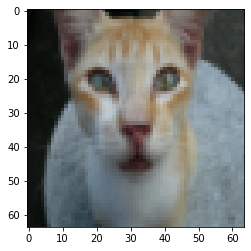

In [5]:
# Example of a picture
index = 11
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [6]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [7]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

In [12]:
### CONSTANTS ###
#  4-layer model
#input layer: 12288
#L1: 20 hidden units
#L2: 7 hidden units
#L3: 5 hidden units
#ouput layer: 1 unit
layers_dims = [12288, 20, 7, 5, 1]
learning_rate=0.0075
iterations=5000

Cost after iteration 0: 1.225716
Cost after iteration 1000: 0.654882
Cost after iteration 2000: 0.557581
Cost after iteration 3000: 0.155503
Cost after iteration 4000: 0.126170


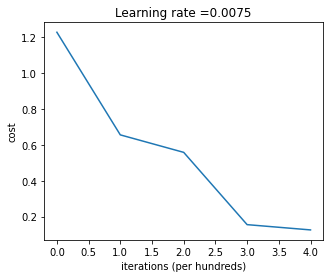

In [14]:
parameters = models.L_layer_model(train_x, train_y, layers_dims, learning_rate=0.0075, num_iterations = iterations, print_cost = True, lambd = 0.1)

In [15]:
predictions_train = predict.predict(train_x, train_y, parameters)

Accuracy: 0.9760765550239232


In [16]:
pred_test = predict.predict(test_x, test_y, parameters)

Accuracy: 0.74


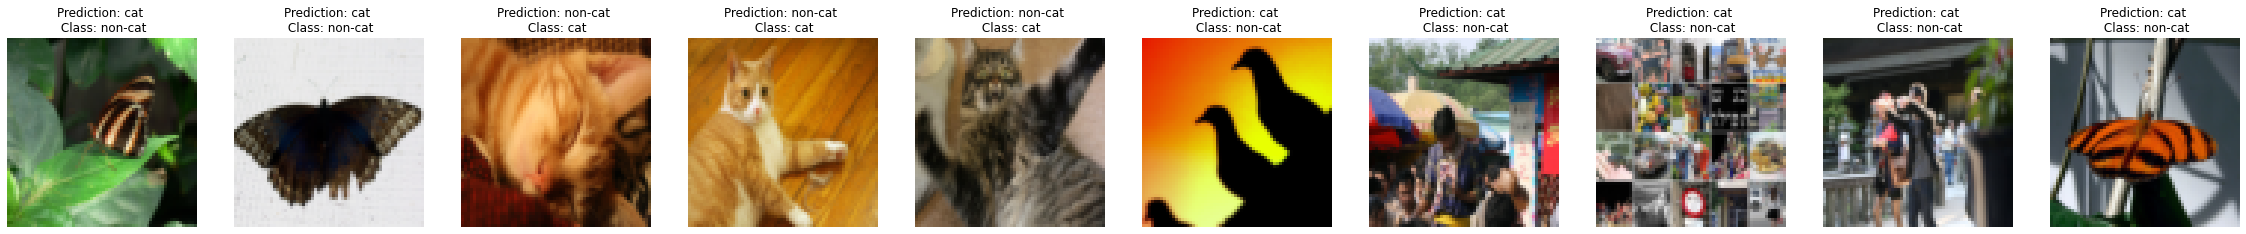

In [15]:
predict.print_mislabeled_images(classes, test_x, test_y, pred_test)